In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
!pip install tensorflow

You should consider upgrading via the 'c:\users\bhargavi pala\anaconda3\python.exe -m pip install --upgrade pip' command.


In [4]:
# Load dataset
df = pd.read_csv("creditcard.csv")

In [5]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [39]:
#checking the shape of the dataset|
df.shape

(284807, 31)

In [7]:
# To get all the details
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,3.919560e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,5.688174e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-8.769071e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.782312e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,-1.552563e-15,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,2.010663e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-1.694249e-15,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,-1.927028e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-3.137024e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


In [8]:
# To check if there is any null values present in the dataset
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [9]:
#To check the Data types of the features
df.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [10]:
# to get all the information about all the features
df.info

<bound method DataFrame.info of             Time         V1         V2        V3        V4        V5  \
0            0.0  -1.359807  -0.072781  2.536347  1.378155 -0.338321   
1            0.0   1.191857   0.266151  0.166480  0.448154  0.060018   
2            1.0  -1.358354  -1.340163  1.773209  0.379780 -0.503198   
3            1.0  -0.966272  -0.185226  1.792993 -0.863291 -0.010309   
4            2.0  -1.158233   0.877737  1.548718  0.403034 -0.407193   
...          ...        ...        ...       ...       ...       ...   
284802  172786.0 -11.881118  10.071785 -9.834783 -2.066656 -5.364473   
284803  172787.0  -0.732789  -0.055080  2.035030 -0.738589  0.868229   
284804  172788.0   1.919565  -0.301254 -3.249640 -0.557828  2.630515   
284805  172788.0  -0.240440   0.530483  0.702510  0.689799 -0.377961   
284806  172792.0  -0.533413  -0.189733  0.703337 -0.506271 -0.012546   

              V6        V7        V8        V9  ...       V21       V22  \
0       0.462388  0.239599  

In [11]:
# printing the 5 rows of the dataset
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [12]:
for item in df.columns:
    print(item, ": " )
    print(df[item].unique())
    print(df[item].value_counts())
    print("************************************************")

Time : 
[0.00000e+00 1.00000e+00 2.00000e+00 ... 1.72787e+05 1.72788e+05
 1.72792e+05]
163152.0    36
64947.0     26
68780.0     25
3767.0      21
3770.0      20
            ..
2088.0       1
64100.0      1
42068.0      1
119630.0     1
140344.0     1
Name: Time, Length: 124592, dtype: int64
************************************************
V1 : 
[-1.35980713  1.19185711 -1.35835406 ...  1.91956501 -0.24044005
 -0.53341252]
 2.055797    77
 1.245674    77
 2.053311    62
 1.302378    60
 2.040211    53
             ..
-0.069327     1
-1.619420     1
 1.174923     1
 2.157306     1
 2.287784     1
Name: V1, Length: 275663, dtype: int64
************************************************
V2 : 
[-0.07278117  0.26615071 -1.34016307 ... -0.30125385  0.53048251
 -0.18973334]
 0.166975    77
-0.326668    77
 0.089735    62
-0.606529    60
-0.146975    53
             ..
 0.520114     1
-0.419199     1
-0.303794     1
 0.167497     1
-0.166213     1
Name: V2, Length: 275663, dtype: int64
*********

 0.726212    77
 0.357827    77
 0.620709    62
 1.018136    60
 0.604827    53
             ..
-0.316948     1
 0.400848     1
 0.271161     1
-0.016787     1
 0.606096     1
Name: V24, Length: 275663, dtype: int64
************************************************
V25 : 
[ 0.12853936  0.1671704  -0.32764183 ...  0.26574545 -0.56915886
 -0.4736487 ]
 0.186423    77
 0.366624    77
-0.297138    62
 0.663575    60
-0.264560    53
             ..
 0.476901     1
-0.207339     1
-0.003946     1
 0.825100     1
-0.236037     1
Name: V25, Length: 275663, dtype: int64
************************************************
V26 : 
[-0.18911484  0.12589453 -0.13909657 ... -0.0873706   0.54666846
 -0.81826712]
-0.398828    77
 0.096544    77
 0.166736    62
-0.671323    60
 0.219671    53
             ..
 0.407455     1
 0.020841     1
 0.071845     1
-0.789816     1
 0.615747     1
Name: V26, Length: 275663, dtype: int64
************************************************
V27 : 
[ 0.13355838 -0.0089831  -

In [13]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

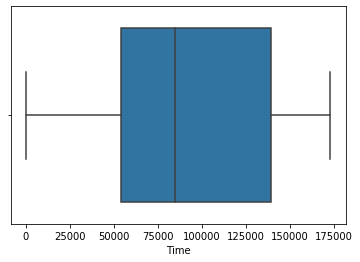

In [52]:
sns.boxplot(df.Time)
plt.show()

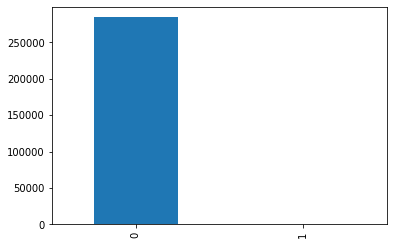

In [14]:
#Plotting the value counts of the "class" feature
df.Class.value_counts().plot.bar()

In [15]:
df["Class"].value_counts()

0    284315
1       492
Name: Class, dtype: int64

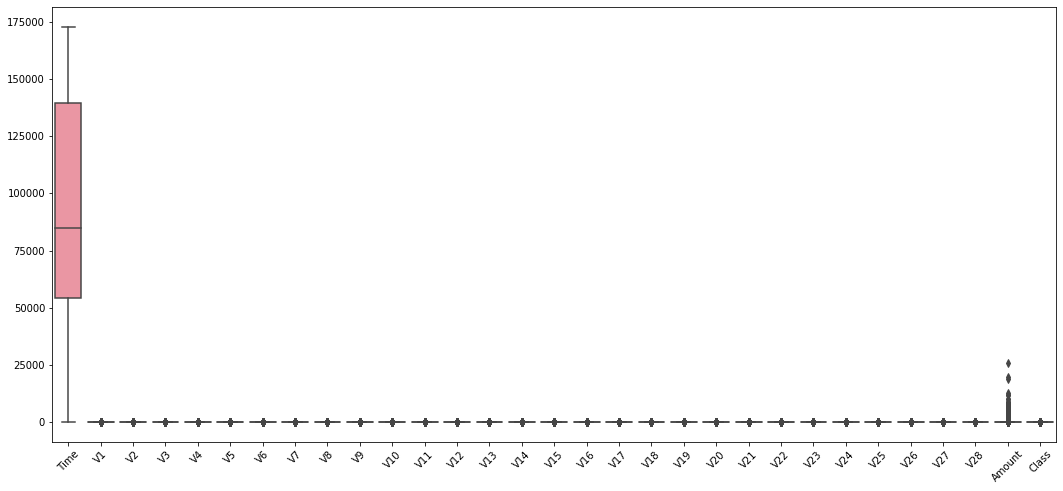

In [42]:
plt.subplots(figsize=(18, 8))
ax = sns.boxplot(data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);

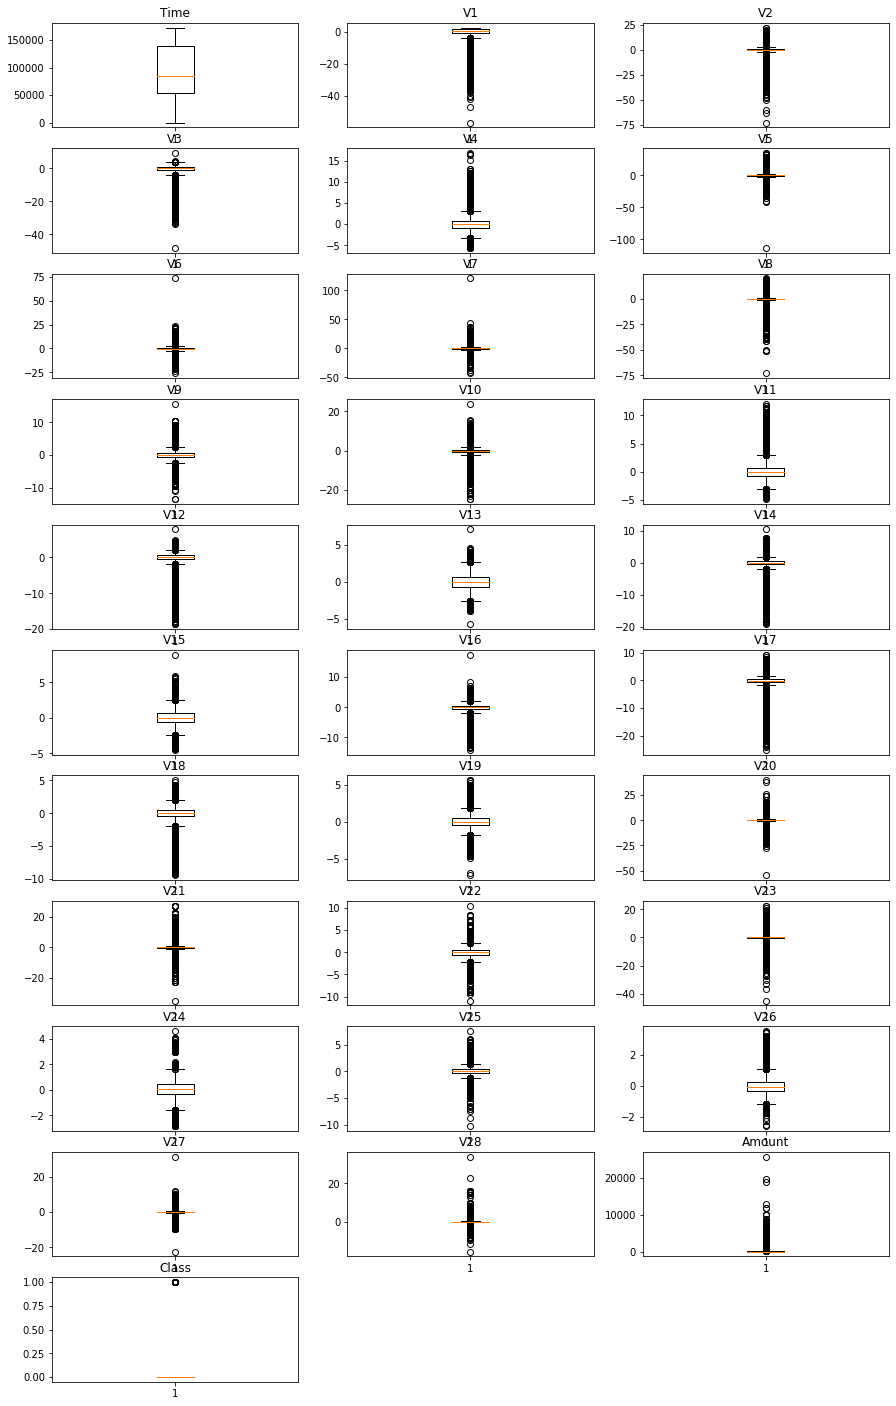

In [16]:
# Checking for the Outliers in the dataset
plt.figure(figsize = (15,25))
count = 1
for col in df:
    plt.subplot(11,3,count)
    plt.boxplot(df[col])
    plt.title(col)
    count += 1
plt.show()

In [17]:
# Dependent and Independent variables

X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [43]:
X.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99


In [44]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Class, dtype: int64

In [45]:
# Splitting in to Train and test dataset

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [46]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(199364, 30) (85443, 30) (199364,) (85443,)


In [22]:
# Feature Scaling

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [23]:
# ANN model

import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense

In [73]:
# Initializing the ANN
model= Sequential()


In [74]:
# Adding the input layer and first Hidden Layer
model.add(Dense(activation = "relu", input_dim = 30, units = 50, kernel_initializer='uniform' ))

model.add(Dense(activation = "relu",units = 40, kernel_initializer='uniform' ))

model.add(Dense(activation = "relu",units = 30, kernel_initializer='uniform' ))


# Adding the Second hidden layer
model.add(Dense(activation = "relu", units =20, kernel_initializer='uniform'))

# Adding the third hidden layer
model.add(Dense(activation = "relu", units = 10, kernel_initializer='uniform'))

# Addinng the output Layer
model.add(Dense(activation = 'sigmoid', units =1, kernel_initializer='uniform',))

In [75]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_23 (Dense)            (None, 50)                1550      
                                                                 
 dense_24 (Dense)            (None, 40)                2040      
                                                                 
 dense_25 (Dense)            (None, 30)                1230      
                                                                 
 dense_26 (Dense)            (None, 20)                620       
                                                                 
 dense_27 (Dense)            (None, 10)                210       
                                                                 
 dense_28 (Dense)            (None, 1)                 11        
                                                                 
Total params: 5,661
Trainable params: 5,661
Non-traina

In [76]:
# compiling the ANN
model.compile(optimizer='adam', loss= 'binary_crossentropy', metrics= ['accuracy'])

In [77]:
# Fitting the ANN to the training set
model.fit(X_train, y_train, batch_size = 100, epochs =10)

Epoch 1/10
1994/1994 [==============================] - 4s 2ms/step - loss: 0.0366 - accuracy: 0.9978
Epoch 2/10
1994/1994 [==============================] - 4s 2ms/step - loss: 0.0215 - accuracy: 0.9983
Epoch 3/10
1994/1994 [==============================] - 3s 2ms/step - loss: 0.0144 - accuracy: 0.9983
Epoch 4/10
1994/1994 [==============================] - 4s 2ms/step - loss: 0.0129 - accuracy: 0.9983
Epoch 5/10
1994/1994 [==============================] - 3s 2ms/step - loss: 0.0132 - accuracy: 0.9983
Epoch 6/10
1994/1994 [==============================] - 3s 2ms/step - loss: 0.0129 - accuracy: 0.9983
Epoch 7/10
1994/1994 [==============================] - 3s 2ms/step - loss: 0.0132 - accuracy: 0.9983
Epoch 8/10
1994/1994 [==============================] - 3s 2ms/step - loss: 0.0135 - accuracy: 0.9983
Epoch 9/10
1994/1994 [==============================] - 3s 2ms/step - loss: 0.0128 - accuracy: 0.9983
Epoch 10/10
1994/1994 [==============================] - 4s 2ms/step - loss: 0.013

In [78]:
# Making the Prediction and Evaluating the model
# Predicting the Test set result
y_pred = model.predict(X_test)
y_pred = (y_pred>0.5)

In [79]:
# Evaluating accuracy score and Confusion matrix

from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import mean_squared_error
from sklearn import metrics
RMSE=np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print("Accuracy Score : ", accuracy_score(y_test, y_pred))
print("Confusion Matrix: ", confusion_matrix(y_pred, y_test))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Accuracy Score :  0.9982795547909132
Confusion Matrix:  [[85296   147]
 [    0     0]]
Root Mean Squared Error: 0.04147824983152929


Accuracy score is 99